# Studying weather patern with python 

The data is downloaded from waetherunderground using html parsing and analyzed/displayed with Pandas.

In [0]:
# imports
% matplotlib inline
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import FileLink, FileLinks

In [0]:
URLS = [f"https://api-ak.wunderground.com/history/airport/LFST/2010/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)]
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2011/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2012/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2013/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2014/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2015/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2016/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2017/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2018/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])
URLS.extend([f"https://api-ak.wunderground.com/history/airport/LFST/2019/{mois}/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190" for  mois in range(1,12+1)])

full_head = ['day', 
             'Thigh', 'Tmid', 'Tlow',
             'Dewhigh', 'Dewmid', 'Dewlow',
             'Humidhigh', 'Humidmid', 'Humidlow',
             'Phigh', 'Pmid', 'Plow',
             'Vishigh', 'Vismid', 'Vislow',
             'Windhigh', 'Windmid', 'Windlow',
             'Rain',]


def tofloat(x):
  v=float(0)
  try:
    v=float(x)
  except:
    v=np.nan
  return v


In [0]:
dataset = []

for mois, url in enumerate(URLS):
  print(f"# Fetching {url} ({mois})")
  contents = urllib.request.urlopen(url).read()
  soup = BeautifulSoup(contents)
  table = soup.find("table", attrs={"id":"obsTable"})

  for row in table.find_all("tr")[2:]:
    data = dict(zip(full_head, ( tofloat(td.get_text().strip()) for td in row.find_all("td")[:-1])))
    data['day']=data.get('day', 0)+mois
    dataset.append(data)

# Fetching https://api-ak.wunderground.com/history/airport/LFST/2010/1/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190 (0)
# Fetching https://api-ak.wunderground.com/history/airport/LFST/2010/2/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190 (1)
# Fetching https://api-ak.wunderground.com/history/airport/LFST/2010/3/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190 (2)
# Fetching https://api-ak.wunderground.com/history/airport/LFST/2010/4/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190 (3)
# Fetching https://api-ak.wunderground.com/history/airport/LFST/2010/5/1/MonthlyHistory.html?req_city=Strasbourg&req_state=&req_statename=France&reqdb.zip=00000&reqdb.magic=340&reqdb.wmo=07190 (4)
# Fetching http

In [0]:
df = pd.DataFrame(dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 20 columns):
day          3656 non-null float64
Thigh        3468 non-null float64
Tmid         3467 non-null float64
Tlow         3468 non-null float64
Dewhigh      3468 non-null float64
Dewmid       3468 non-null float64
Dewlow       3468 non-null float64
Humidhigh    3468 non-null float64
Humidmid     3468 non-null float64
Humidlow     3468 non-null float64
Phigh        3468 non-null float64
Pmid         3468 non-null float64
Plow         3468 non-null float64
Vishigh      3465 non-null float64
Vismid       3465 non-null float64
Vislow       3465 non-null float64
Windhigh     3468 non-null float64
Windmid      3468 non-null float64
Windlow      499 non-null float64
Rain         3469 non-null float64
dtypes: float64(20)
memory usage: 571.7 KB


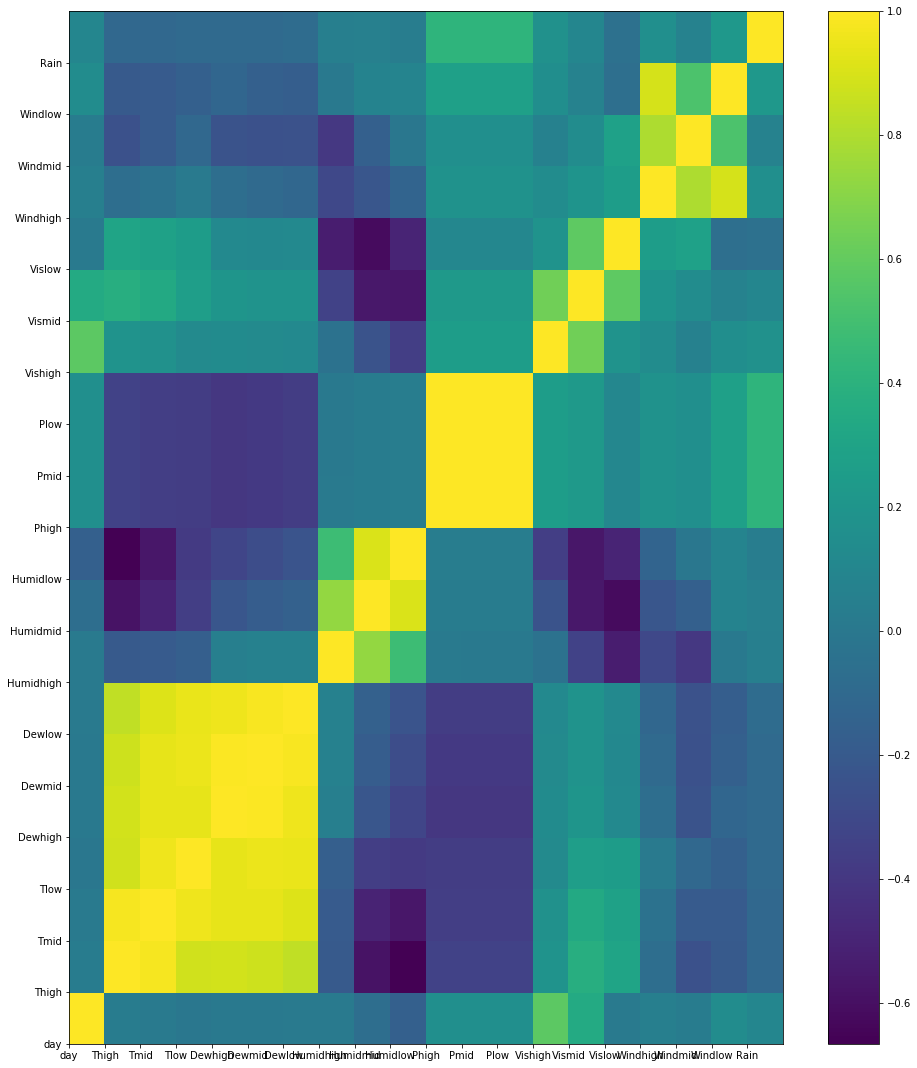

In [0]:
plt.figure(figsize=(16,19))
plt.pcolormesh(df.corr())
plt.xticks(list(range(len(full_head))), full_head)
plt.yticks(list(range(len(full_head))), full_head)
plt.colorbar()
plt.show()

In [0]:
df[['Thigh', 'Windhigh', 'Rain']].corr()

,Thigh,Windhigh,Rain
Thigh,1.000000,-0.069207,-0.110623
Windhigh,-0.069207,1.000000,0.156298
Rain,-0.110623,0.156298,1.000000


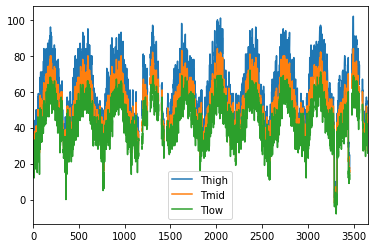

In [0]:
df[['Thigh', 'Tmid', 'Tlow']].plot()

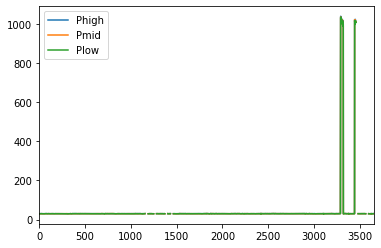

In [0]:
df[['Phigh', 'Pmid', 'Plow']].plot()

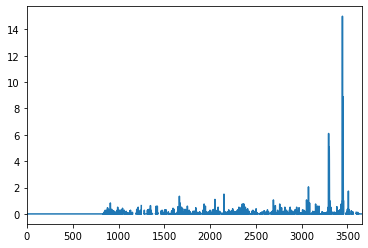

In [0]:
df['Rain'].plot()

In [0]:
df.to_csv('2010_2019.csv')
FileLinks('.')

./
  2010_2019.csv
./.config/
  .last_update_check.json
  active_config
  gce
  config_sentinel
  .last_survey_prompt.yaml
  .metricsUUID
./.config/configurations/
  config_default
./.config/logs/2019.12.18/
  16.52.31.147337.log
  16.52.05.166856.log
  16.52.34.414154.log
  16.52.35.435000.log
  16.52.20.616768.log
./sample_data/
  anscombe.json
  README.md
  california_housing_test.csv
  mnist_test.csv
  california_housing_train.csv
  mnist_train_small.csv

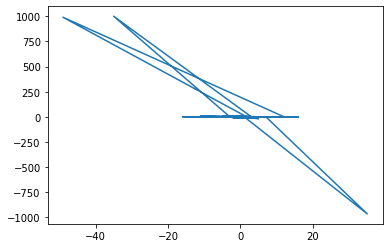

In [0]:
dT = [ df.iloc[i+1]['Tmid'] - df.iloc[i]['Tmid'] for i in range(len(df)-1) ]
dP = [ df.iloc[i+1]['Pmid'] - df.iloc[i]['Pmid'] for i in range(len(df)-1) ]

plt.plot(dT, dP)


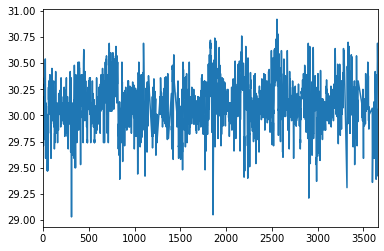

In [0]:
df[df.Phigh<50]['Phigh'].plot()

3658

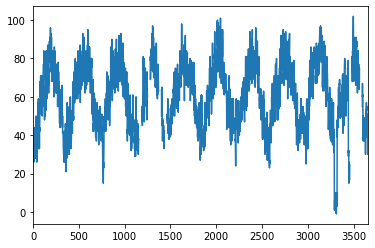

In [0]:
df['Thigh'].plot()

len(df)

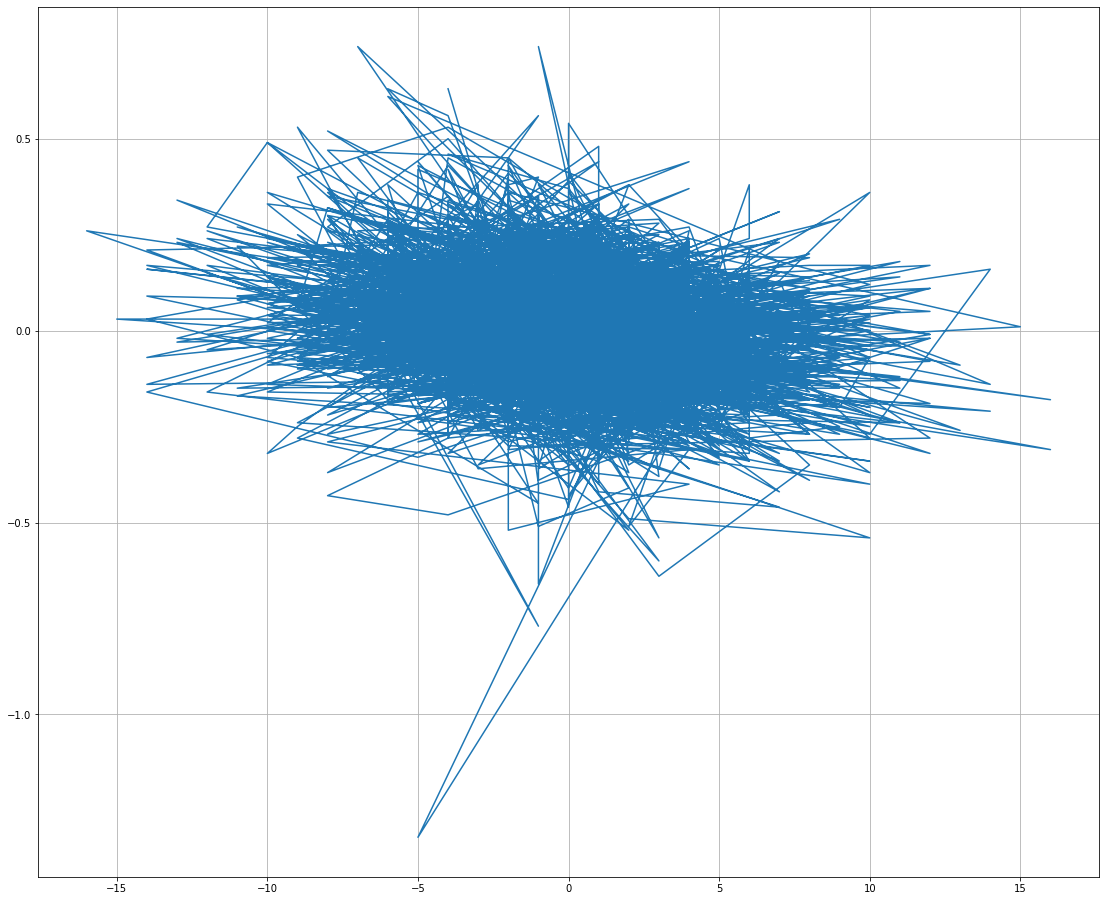

In [0]:
cleandata= df[df.Phigh<50]

dT = [ cleandata.iloc[i+1]['Tmid'] - cleandata.iloc[i]['Tmid'] for i in range(len(cleandata)-1) ]
dP = [ cleandata.iloc[i+1]['Pmid'] - cleandata.iloc[i]['Pmid'] for i in range(len(cleandata)-1) ]

plt.figure(figsize=(19, 16))
plt.grid(True)
plt.plot(dT, dP)
plt.show()

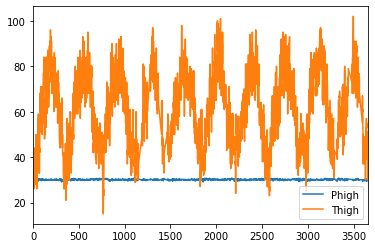

In [0]:
cleandata[['Phigh', 'Thigh']].plot()

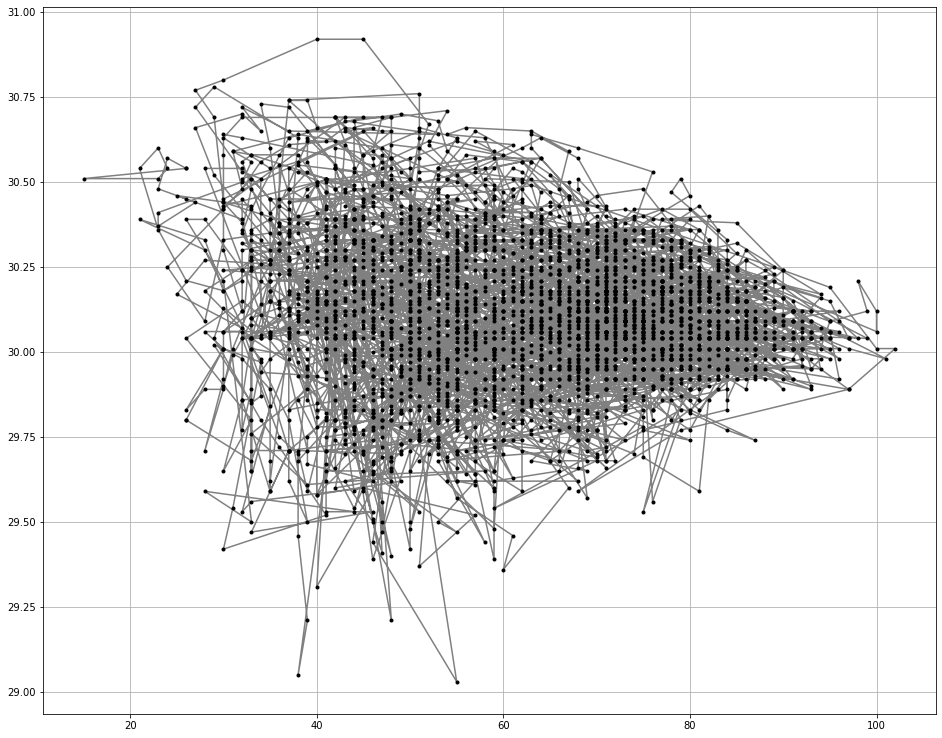

In [0]:
plt.figure(figsize=(16, 13))
plt.grid(True)

plt.plot(cleandata.Thigh, cleandata.Phigh, '-',color='grey')
plt.plot(cleandata.Thigh, cleandata.Phigh, '.k')
plt.show()

(array([   4.,    6.,   47.,  191.,  511., 1302.,  870.,  370.,  112.,
           9.]),
 array([29.03 , 29.219, 29.408, 29.597, 29.786, 29.975, 30.164, 30.353,
        30.542, 30.731, 30.92 ]),
 <a list of 10 Patch objects>)

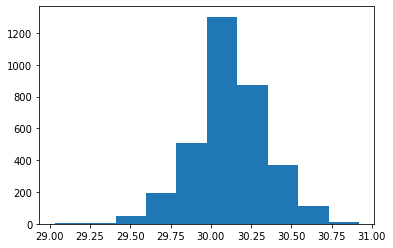

In [0]:
plt.hist(cleandata['Phigh'])